In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [1]:
from google.colab import files

uploaded = files.upload()


Saving house_prices_dataset.csv to house_prices_dataset.csv


In [4]:
import pandas as pd

df = pd.read_csv('house_prices_dataset.csv')
df.head()

,Area,Bedrooms,Age,Price
0,1360.0,2.0,12.0,219622.0
1,4272.0,3.0,32.0,627640.0
2,3592.0,1.0,32.0,516620.0
3,966.0,1.0,28.0,138036.0
4,4926.0,2.0,13.0,726016.0


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      980 non-null    float64
 1   Bedrooms  985 non-null    float64
 2   Age       990 non-null    float64
 3   Price     958 non-null    float64
dtypes: float64(4)
memory usage: 31.4 KB


,Area,Bedrooms,Age,Price
count,980.000000,985.000000,990.000000,958.000000
mean,2819.114286,2.989848,20.361616,430261.953027
std,1257.493699,1.428477,11.138368,188989.430523
min,503.000000,1.000000,1.000000,63425.000000
25%,1752.000000,2.000000,11.000000,272054.000000
50%,2862.500000,3.000000,21.000000,431464.500000
75%,3858.750000,4.000000,30.000000,581729.500000
max,4999.000000,5.000000,39.000000,793789.000000


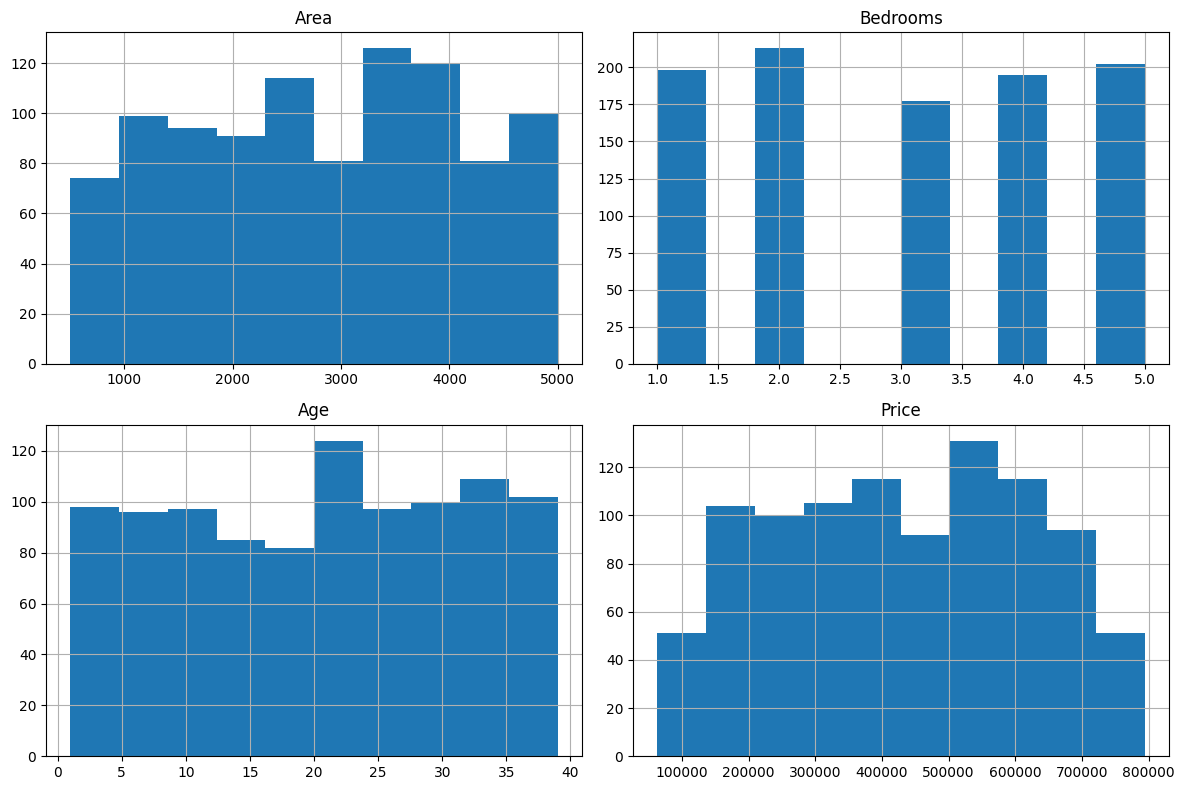

In [6]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


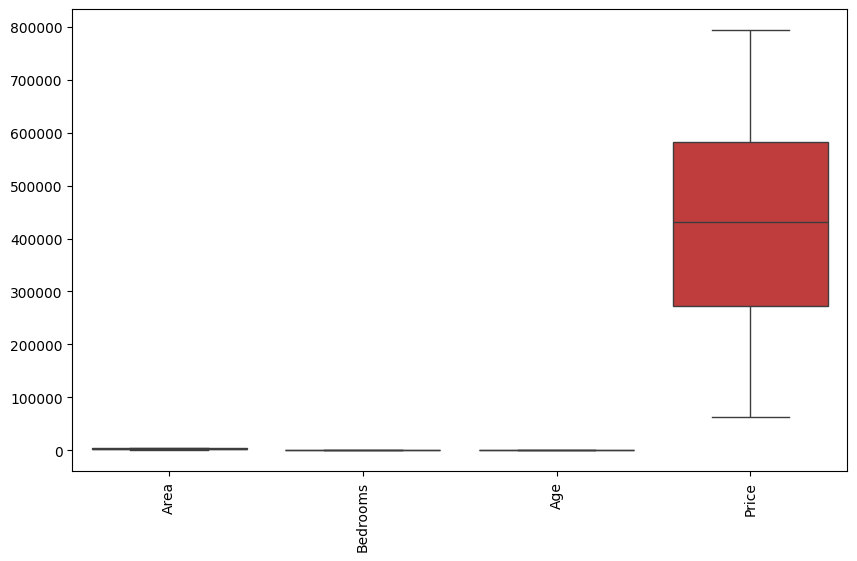

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


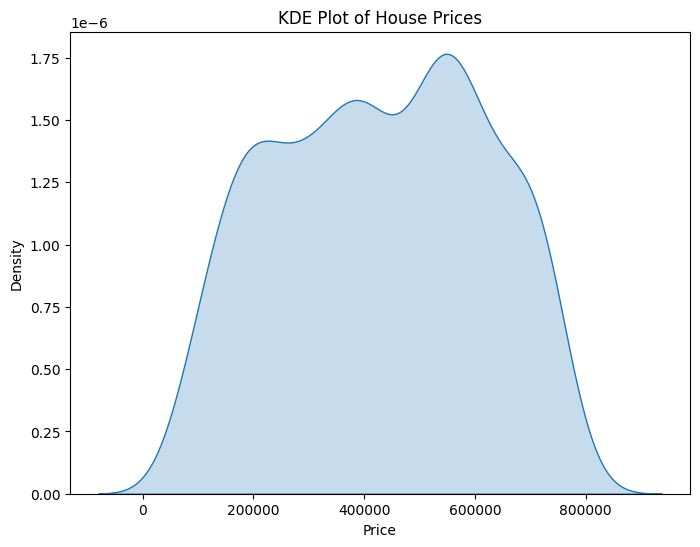

In [8]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Price'], fill=True)
plt.title("KDE Plot of House Prices")
plt.show()


In [9]:
X = df.drop('Price', axis=1)   # Features
y = df['Price']                # Target

In [10]:
def train_evaluate_model(test_size):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    return y_test, y_pred, mse, rmse, mae, mape


In [12]:
# Temporarily clean X and y for this execution by dropping rows with NaN values
original_X = X.copy()
original_y = y.copy()

# Combine X and y to drop NaNs consistently across both features and target
temp_df = pd.concat([X, y], axis=1).dropna()
X = temp_df.drop('Price', axis=1)
y = temp_df['Price']

y_test_80, y_pred_80, mse_80, rmse_80, mae_80, mape_80 = train_evaluate_model(0.20)

print("80:20 Split Results")
print("MSE :", mse_80)
print("RMSE:", rmse_80)
print("MAE :", mae_80)
print("MAPE:", mape_80)

# Restore original X and y to avoid side effects for subsequent cells
X = original_X
y = original_y

80:20 Split Results
MSE : 133871994.89277299
RMSE: 11570.30660323109
MAE : 9968.446487515617
MAPE: 3.135919303672794


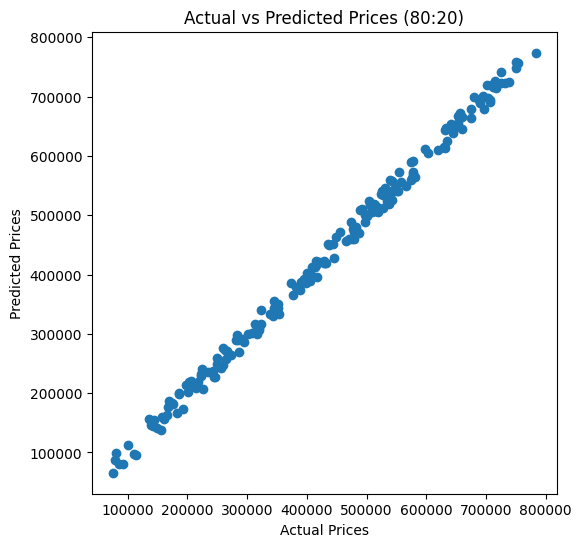

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_80, y_pred_80)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (80:20)")
plt.show()


In [15]:
# Temporarily clean X and y for this execution by dropping rows with NaN values
original_X = X.copy()
original_y = y.copy()

# Combine X and y to drop NaNs consistently across both features and target
temp_df = pd.concat([X, y], axis=1).dropna()
X = temp_df.drop('Price', axis=1)
y = temp_df['Price']

y_test_70, y_pred_70, mse_70, rmse_70, mae_70, mape_70 = train_evaluate_model(0.30)

print("70:30 Split Results")
print("MSE :", mse_70)
print("RMSE:", rmse_70)
print("MAE :", mae_70)
print("MAPE:", mape_70)

# Restore original X and y to avoid side effects for subsequent cells
X = original_X
y = original_y

70:30 Split Results
MSE : 137851042.00019008
RMSE: 11740.998339161371
MAE : 10176.047426703755
MAPE: 3.2357206838824286


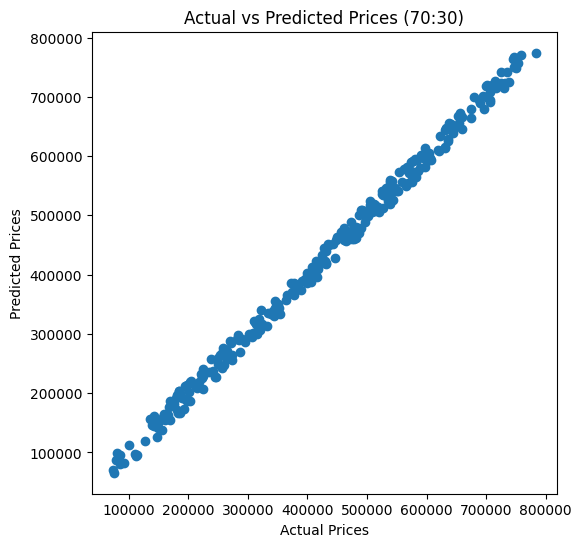

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_70, y_pred_70)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (70:30)")
plt.show()
